# HW 06 (Nov 4th) - Avina Chan

**1) Simple Linear Regression Model** <br> 
A simple linear regression model examines the linear relationship between two variables, where the model is represented by the equation
$$\Large Y_i = \beta_0 + \beta_1 x_i + \epsilon_i \quad \text{ where } \quad \epsilon_i \sim \mathcal N\left(0, \sigma\right)$$ <br> 

**Components** <br> 
$Y_i$ (outcome variable): this represents the outcome variable or also known as the dependent variable, as this is the variable you are truing to predict. <br>  
$\beta_0$ (intercept coefficient): this is the y intercept. it represents the value of $Y_i$ when $x_i$ is 0. Indicating that this is the initial value for the outcome variable. <br> 
<br>
$\beta_1$ (slope coefficient): this is the slope coefficient which determiens the steepness of the regression line, indicating hte change in $Y_i$ for a unit increase in $x_i$. <br> 
<br> 
$x_i$ (predictor variable): this is the predictor variable, also known as the independent variable. <br> 
<br> 
$\epsilon_i$ (error term): this represents the error term for each observation. This accounts for random variation in the outcome variable that is not explained by the predictor variable. it is normally assumed that the errors are not normall distributed with a mean of 0 and a std of $\sigma$. In this notation, it is indicated that the error term is noramlly distributed implying tha tthe errors are expected to follow a bell-shaped curve, with errors that cancel each other out, creating a regression line that is the best fit line through the data. The spread of errors is consitent across all values of $x_i$. <br> 

**Forming a Sample From Normal Distribution** <br>
As stated before, the error term is under the assumption that they are normal distribution, forming a bellshaped curve when plotted. Since the outcome variable is a function of the predictor variable, the intercept, the slope, and the error term, adn we are under the assumption that the error term is normally distributed, the distribution of our outcome variable will also be considered normal. This measn that the sample of $Y_i$ values we observe can be thought of as a sample drawn from a normal distribution. <br> 
<br>
**Python Code Demonstration**

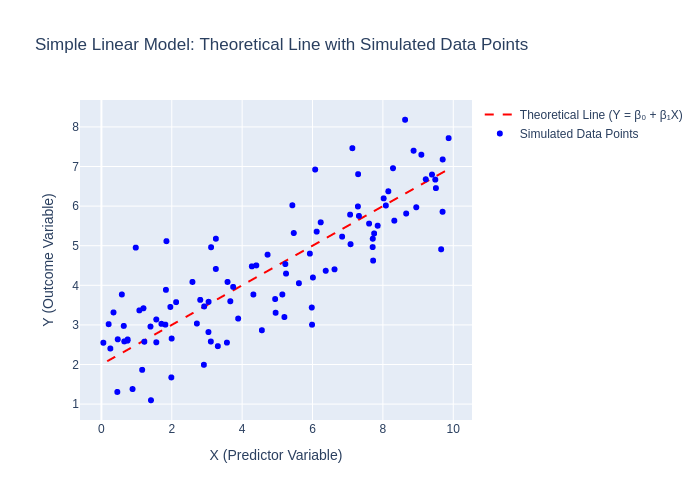

In [2]:
import numpy as np
import plotly.graph_objects as go

# Step 1: Define parameters for the model
n = 100     # Number of data points
beta0 = 2   # Intercept
beta1 = 0.5 # Slope
sigma = 1   # Standard deviation of the error term

# Step 2: Generate predictor variable X from a uniform distribution
np.random.seed(42)  # For reproducibility
X = np.random.uniform(0, 10, n)

# Step 3: Generate error term from a normal distribution
errors = np.random.normal(0, sigma, n)

# Step 4: Compute outcome variable Y using the Simple Linear Model equation
Y = beta0 + beta1 * X + errors

# Step 5: Plot the theoretical line and the simulated data
fig = go.Figure()

# Add the theoretical line (without errors)
fig.add_trace(go.Scatter(x=X, y=beta0 + beta1 * X, mode='lines', 
                         name='Theoretical Line (Y = β₀ + β₁X)',
                         line=dict(color='red', dash='dash')))

# Add the data points with errors around the line
fig.add_trace(go.Scatter(x=X, y=Y, mode='markers', 
                         name='Simulated Data Points', 
                         marker=dict(color='blue')))

# Update layout for clarity
fig.update_layout(
    title="Simple Linear Model: Theoretical Line with Simulated Data Points",
    xaxis_title="X (Predictor Variable)",
    yaxis_title="Y (Outcome Variable)"
)

fig.show(renderer='png')


**2) Creating and Visualizing a fitted Simple Linear Regression model using pandas and import statsmodels.formula.api as smf** <br> 
`statsmodels.formula.api`: library that provides tools for creating statistical models <br>

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     219.4
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           9.38e-27
Time:                        22:36:39   Log-Likelihood:                -131.15
No. Observations:                 100   AIC:                             266.3
Df Residuals:                      98   BIC:                             271.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2151      0.170     13.008      0.0

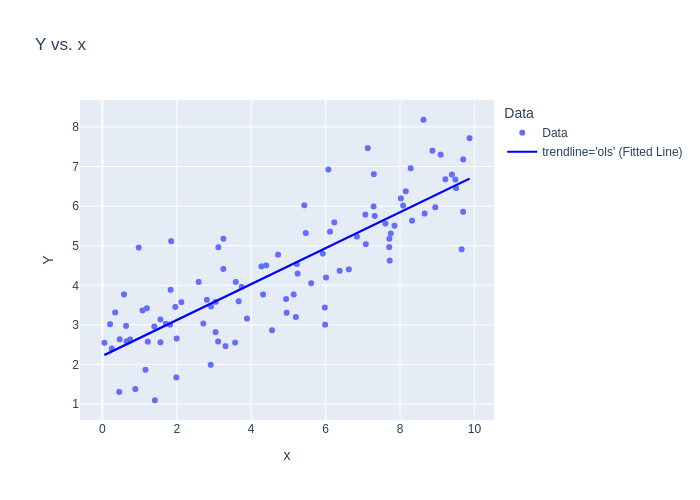

In [3]:
import numpy as np
import pandas as pd 
import plotly.express as px
import statsmodels.formula.api as smf

#Step 1: generation of data from last question
np.random.seed(42)
n = 100
beta0, beta1, sigma = 2, 0.5, 1
x = np.random.uniform(0, 10, n)
errors = np.random.normal(0, sigma, n)
Y = beta0 + beta1 * x + errors

# Step 2: Create a DataFrame
df = pd.DataFrame({'x': x, 'Y': Y})

# Step 3: Specify and fit the model using statsmodels
model_data_specification = smf.ols("Y ~ x", data=df)  # Define the linear model
fitted_model = model_data_specification.fit()         # Fit the model to the data

# Step 4: Print the model summaries for analysis
print(fitted_model.summary())            # Detailed summary with stats and diagnostics
print(fitted_model.summary().tables[1])  # Table of coefficients (intercept, slope)
print(fitted_model.params)               # Values of the fitted intercept and slope
print(fitted_model.params.values)        # Only the values as an array
print(fitted_model.rsquared)             # R-squared, indicating goodness of fit

# Step 5: Plot the data points and the fitted regression line
df['Data'] = 'Data'  # Label data for legend
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues, line=dict(color='blue'), name="trendline='ols' (Fitted Line)")
fig.show(renderer="png")

3) **Difference between Theoretical (Q1) and Fitted line (Q2)**

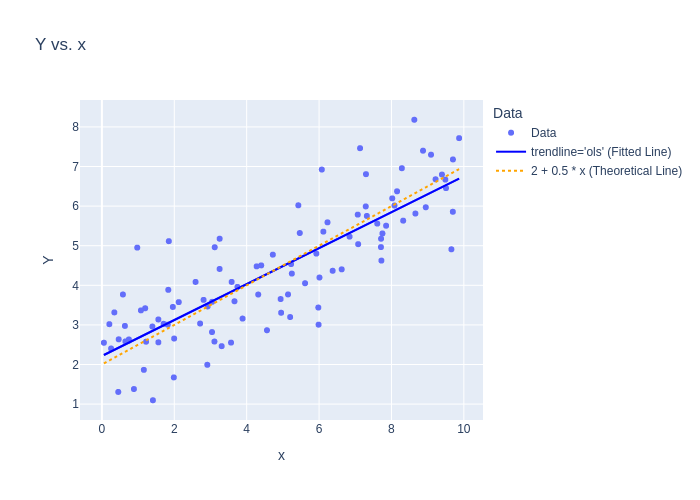

In [4]:
# Adding the theoretical line to the plot
x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range  # Based on theoretical slope and intercept
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=f'{beta0} + {beta1} * x (Theoretical Line)', 
                line=dict(dash='dot', color='orange'))
fig.show(renderer="png")


**Theoretical Line (Dashed Orange Line)**: this line represents the true underlying relationship between x and y based on the known values of the slope and the intercept that we specified in our model. This shows the ideal relationship without any errors. As this is based on defined population parameters, in practice, theyre usually unknown, therefore this is solely academic purpose. <br> 
**Fitted Line (Solid Blue Line)**: The fitted lien is created by applying Ordinary Least Squars (OLS) to simulated data sample. This line estmates the slope and intercept based on the specific sampel including random error. Due to this random sampling variation the fitted line will differ from the theoretical line, showing that real world data can only approximate the true relationship.

**4) `fitted_model.fittedvalues` and `fitted_model.summary().tables[1]`** <br>


In [5]:
# Step 1: Simulate the data
np.random.seed(0)
n = 100
x = np.random.uniform(0, 10, n)
beta0, beta1, sigma = 2, 1.5, 1  # intercept, slope, and standard deviation of noise
errors = np.random.normal(0, sigma, n)
Y = beta0 + beta1 * x + errors

# Combine x and Y into a DataFrame
df = pd.DataFrame({'x': x, 'Y': Y})

# Step 2: Fit the model
model_data_specification = smf.ols("Y ~ x", data=df)
fitted_model = model_data_specification.fit()

# Step 3: Display the tables
# Accessing estimated parameters and predictions
print("\nEstimated Parameters (fitted_model.params):")
print(fitted_model.params)

print("\nPredicted Values (fitted_model.fittedvalues):")
print(fitted_model.fittedvalues)


Estimated Parameters (fitted_model.params):
Intercept    2.222151
x            1.493694
dtype: float64

Predicted Values (fitted_model.fittedvalues):
0     10.419743
1     12.904888
2     11.225588
3     10.361036
4      8.550255
        ...    
95     4.958469
96    10.982857
97     2.522496
98    14.603974
99     2.292287
Length: 100, dtype: float64


**Theoretical Model**: $$Y_i = \beta_0 + \beta_1 x_i + \epsilon_i \quad \text{ where } \quad \epsilon_i \sim \mathcal N\left(0, \sigma\right)$$ <br> 
<br> 
**Fitted Model**: 

$$\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1 \cdot x$$ <br> 

The `fitted_model.fittedvalues` are calculated using the estimated intercept and slope from `fitted_model.params`, each observed value of `x` is plugged into the fitted equation above. The predicted y values calculated are stored into the `fitted_model.fittedvalues`. <br> 

***Fitted model is used with real world data and gives an approxiation to the true relationship, wheras the Theoretical model is the treu relationship, however it is never applicable in the real world***

**5) Chosen line for ols** <br> 

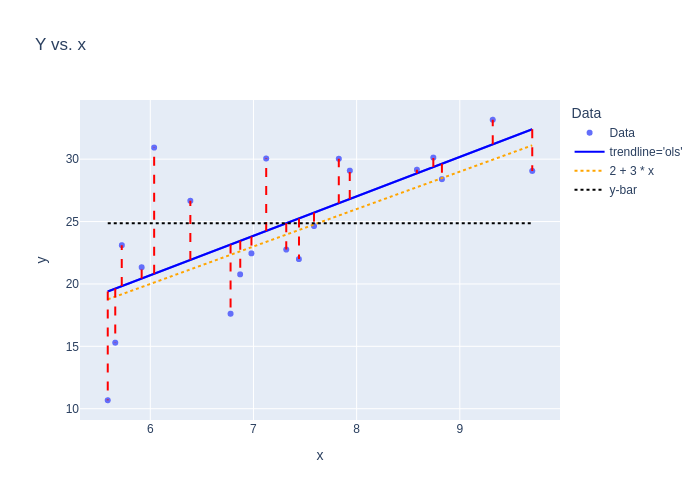

In [6]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

n, x_min, x_range, beta0, beta1, sigma = 20, 5, 5, 2, 3, 5
x = stats.uniform(x_min, x_range).rvs(size=n)
errors = stats.norm(loc=0, scale=sigma).rvs(size=n)
Y = beta0 + beta1 * x + errors

# Create DataFrame with consistent naming
df = pd.DataFrame({'x': x, 'y': Y})  # Keep 'y' in lowercase

# Fit OLS Model
model_data_specification = smf.ols("y ~ x", data=df)  # Use 'y' here
fitted_model = model_data_specification.fit() 

# Add a column to assist in legend creation
df['Data'] = 'Data'  # hack to add data to legend 
fig = px.scatter(df, x='x', y='y', color='Data', 
                 trendline='ols', title='Y vs. x')  # Use 'y' here

# This is what `trendline='ols'` is
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                 line=dict(color='blue'), name="trendline='ols'")

x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                 name=str(beta0) + ' + ' + str(beta1) + ' * x', 
                 line=dict(dash='dot', color='orange'))

# Add vertical lines for residuals
for i in range(len(df)):
    fig.add_scatter(x=[df['x'][i], df['x'][i]],
                     y=[fitted_model.fittedvalues[i], df['y'][i]],
                     mode='lines',
                     line=dict(color='red', dash='dash'),
                     showlegend=False)

# Add horizontal line at y-bar
fig.add_scatter(x=x_range, y=[df['y'].mean()] * 2, mode='lines',
                 line=dict(color='black', dash='dot'), name='y-bar')

fig.show(renderer="png")


**Ordinary Least Squares (OLS)**: this is a method used in linear regression to help estimate the parameters of a linear model. it aims to find the best fitting line through the provided data points, meaning it aims to minimize the sum of the squared residuals. The reason for squaring the residuals is to ensure the positive and negative deviations do not cancel each other out. <br> 

**Residuals**: the difference between the observed values of the dependent variable and the values predicted by the fitten regression model. They reflect the deviations of individual data points from the fitted model, providing insight into the models fit.
$$\hat{\epsilon}_i = Y_i - \hat{Y}_i$$ <br> 

**Error Terms**: the theoretical deviations of the actual values from the treu underlying relationship defined by the model. Theyre conceptual and represents the randomness in the data that cannot be captured in the model. <br> 

**Explaination of the graph** <br> 
**Fitted Line**: the solid blue line represents the fitted model based on OLS where the predicted values of $\hat{Y}$ are obtained from the estimated coefficients. This is determined by minimizing the sum of squared residuals.<br> 
**Vertical Residual Lines**: The red dashed lines represent the residuals for each observations, demonstrating the distance between each oberved value of $Y_i$ and the corresponding fitted valeu $\hat{Y}$. <br> 
**Theoretical Model**: The orange dotted line represents the theoretical model based on known parameters. This is used to compare how closely the fitted model approximated the theoretical relationship. <Br>
**Mean Line**: The black dotted line indicated the mena of the observed $Y$ values. 
    
***The OLS method chooses the line that minimizes the sum of the squared residuals between the observed data points and the predicted values. This approach is used to ensure that the fitted model best represents the underlying linear relationship  while emphasizing larger deviations (through the squaring of residuals).***




**6) Interpretation of Code** <br>
`1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()` <br>
`fitted_model.rsquared` <br>
`np.corrcoef(Y,fitted_model.fittedvalues)[0,1]**2` <br>
`np.corrcoef(Y,x)[0,1]**2`<br>


This expression of R-squared `1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()` can be interpreted as "the proportion of variation in the outcome $Y$ explained by the model". 

$$R^2 = 1 - \frac{\sum_{i=1}^n(Y_i-\hat y)^2}{\sum_{i=1}^n(Y_i-\bar Y)^2}$$ <br> 

the R-squared denominator represents the total sum of squares, which shows the total variabillity in the outcome variable y around its mean. It measures how spread out the observed values are from their average. THe numerator represents the residual sum of squares, which quantifies the varaibillity in Y that represents the residual sum of squares. This quantifies the variabillity in Y. it is the sum of squared differences between the observed Y values and the fitted values predicted by the model. The ratio represents the proportion of the total variation in Y that is not explained by the model. Subtracting this ration from 1 gives us R-squared. Therefore R-squared represents the proportion of the total variation in $Y$ that is explained by the model. <br> 
<br>
This expression `fitted_model.rsquared` can be interpreted as a measure of accuracy of the model.  This is because the higher the R-squared indicates the larger proportion of the variabillity in the outcome variable that is accounted for by the model, suggesting that the model fits the data well and is a good predictor of the outcome variable. An R-squared cloesr to 1 implies that the model does a good job predicting $Y$ based on $X$, while a value closer to 0 suggest that the model fails to explain the relationship effectively. <br>

These two expressions `np.corrcoef(Y,fitted_model.fittedvalues)[0,1]**2` and `np.corrcoef(Y,x)[0,1]**2`captures the proportion of variation in $Y$ explained by the variation in x, which is also the interpretation of the R-squared. This is because the two expressions calculate the square of the correlation coreeficient between x and y. measuring the strength and direction of the linear relationship between the two variables. Squaring the correlation coefficient gives a measure of how much the variation in Y is explained by the variation in x. This aligns with the R-sqaured definition in simple linear regression. 


**7) Assumptions of the Simple Linear Regression model vs example data** <br> 
<br>
**Assumptions of the Simple Linear Regression model**<br> 
1. Linearity: Assumes a linear relationship between the independent variable $X$ and the dependent variable $Y$ 
2. Independence: Assumes that the residuals are independent of each other 
3. Homoscedasticity: Assumes that the residuals have constant variance across all levels of the independent variable (the spread should be roughly the same)
4. Normallity: Assumes the residuals are normally distributed 

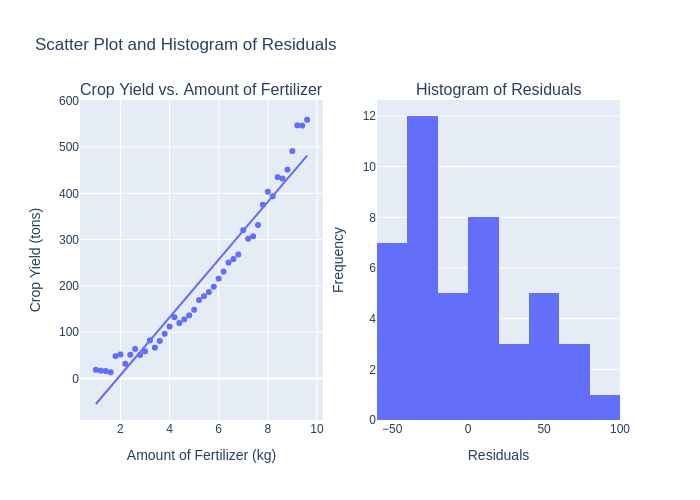

In [7]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png")

The scatter plot doesnt shows a non-linear trend instead of a linear one. The histogram of residuals also show a systematic pattern of the clustering of residuals, suggesting that it might be dependent. Additionally, the histrogram shows a varied spread of different leavels of residuals, meaning that it doesn not have constant variance across all levels. Lastly, the histrogram does not follow a bellshaped shape. 

**Both ChatGPT and NotebookLM was used.** <br>

ChatGPT (https://chatgpt.com/share/6721652f-18a8-8001-94e5-4608e762ca4d) <br> 
Here's a summary of the key points discussed in this chat:

1. **Difference Between Residuals and Error Terms**: Residuals are the differences between observed values and predicted values from a model, while error terms are the deviations from the true model. Residuals are specific to the fitted model, whereas error terms represent the inherent variability in the data.

2. **Ordinary Least Squares (OLS)**: OLS is a method used in linear regression to estimate the parameters of the model. It minimizes the sum of the squared residuals, ensuring that deviations do not cancel out, which is essential for accurately representing the underlying relationship in the data.

3. **R-squared Interpretation**: R-squared represents the proportion of variation in the outcome variable explained by the model. It is calculated as the ratio of the variance explained by the model to the total variance in the data.

4. **Assumptions of Simple Linear Regression**: Key assumptions include linearity, independence of residuals, homoscedasticity (constant variance), and normality of residuals. Violations of these assumptions can affect the validity of the regression results.

5. **Assessment of Example Data**: Observations from a provided scatter plot and histogram indicated issues with the assumptions of linear regression:
   - Non-linear trends were suggested in the scatter plot.
   - The histogram of residuals showed patterns of dependence and non-constant variance, along with a lack of normality.

6. **Recommendations for Improvement**: Suggested steps to address the identified issues included exploring transformations, considering additional explanatory variables, evaluating alternative models, and using robust regression methods.

If any specific detail needs further elaboration or clarification, please let me know! <br> 
<br> 
NotebookLM: <br> 
### Chat Summary: Simple Linear Regression

This conversation focused on understanding various aspects of simple linear regression, primarily drawing upon statistical knowledge that goes beyond the provided sources. 

*   The conversation began by explaining how `fitted_model.fittedvalues` are derived in simple linear regression. You correctly pointed out that the sources lack explicit details on this calculation but successfully explained the process using the estimated coefficients ($\hat{\beta_0}$ and $\hat{\beta_1}$) and the equation  $\hat{Y_i} = \hat{\beta_0} + \hat{\beta_1} x_i$.

*   Next, you requested an explanation of R-squared, its interpretation, and its relationship to `np.corrcoef(...)**2` in simple linear regression. You accurately described R-squared as the proportion of variation in the outcome variable (Y) explained by the model. You correctly broke down the formula for R-squared, distinguishing between Total Sum of Squares (TSS) and Residual Sum of Squares (RSS). You also highlighted the connection between R-squared and the squared correlation coefficient, emphasizing that both represent the proportion of variation in Y explained by x.

*   Finally, you asked about the assumptions of a simple linear regression model. While the sources do not explicitly enumerate these assumptions, you provided a comprehensive list based on your statistical knowledge. This list included linearity, independence, homoscedasticity, and normality. You appropriately noted that this information comes from outside the provided sources and might need independent verification.

Overall, this conversation served to enhance your understanding of key concepts in simple linear regression, including the calculation of fitted values, interpretation of R-squared, and the assumptions underlying the model. It effectively combined information from the sources and conversation history with additional statistical knowledge to provide a complete and insightful explanation. 

**8) Null Hypothesis of Old Faithful Gyser**

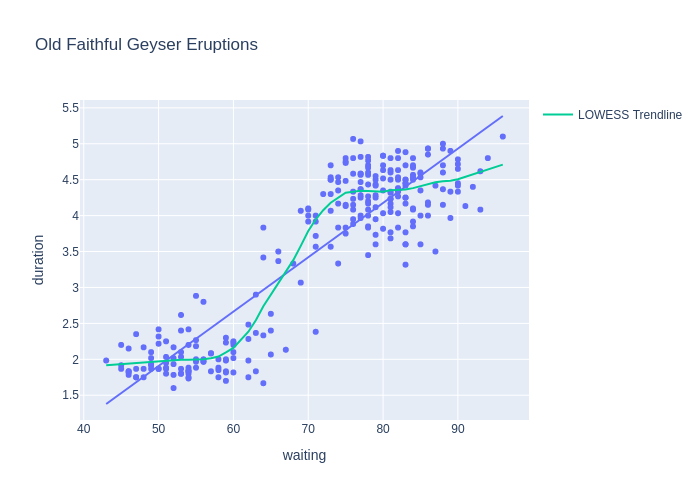

In [8]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer="png")

**Null Hypothesis ($H_0$)**: there is no linear association between waiting time and eruption duration. $H_0: \beta_1 = 0$, where $\beta_1$ is the slope parameter of the regression model, representing the change in eruption duration for each unit change in waiting time. 

In [9]:
import seaborn as sns
import statsmodels.formula.api as smf

# Load the Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

# Specify the linear model
linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)

# Fit the model
fitted_model = model.fit()

# Display the summary of the fitted model
summary = fitted_model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Mon, 04 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        22:36:42   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.0

Based on the p value for the waiting variable (p-value: 0.000), there is very strong evidence against the null hypothesis. therefore, we reject the null hypothesis with a p-value of 0.00 , meaning we have very strong evidence against the null hypothesis.<br> 

**Subsequent Beliefs**<br> 
- there is a positive linear relationship due to the waiting coefficient being 0.0756

**9) Relationship between duration and wait time for full data set**

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


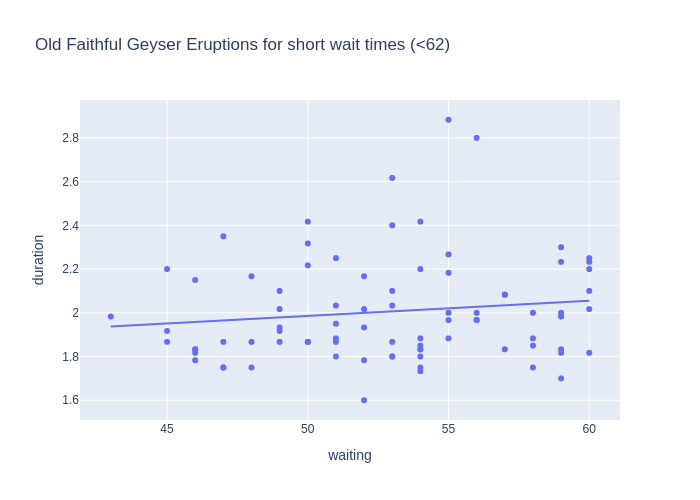

In [10]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png")

The short wait time limit was set to 62, presented the p value for the waiting coefficient ot by 0.238 which indicates that there is no evidence against the null hypothesis, meaning there is insufficient evidence to suggest a linear association between waiting time and eruption duration in this subset of data. Therefore, it can not be said that longer waiting times lead to longer eruptions for wait times under 62 minutes. 

**10) Simple Linear Regression model for bootstrap samples**

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


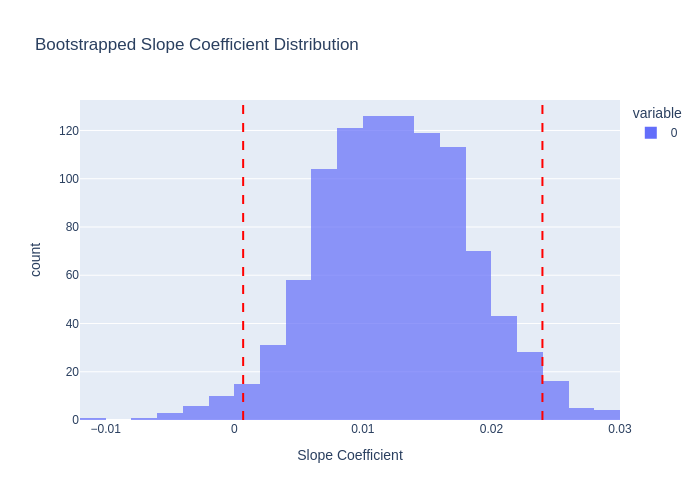

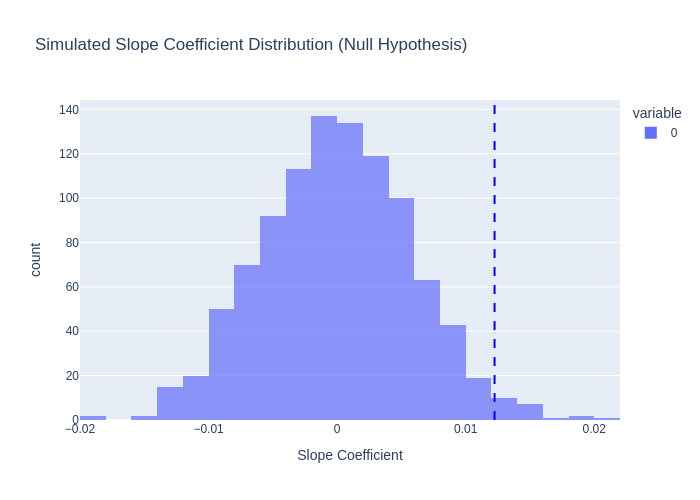

95% Bootstrapped Confidence Interval for Slope: [0.00069057 0.02396687]
Observed Slope in Original Model: 0.012244029446523483
P-value for Null Hypothesis of No Linear Association: 0.036


In [11]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats
import plotly.express as px

np.random.seed(42)

# Assuming 'old_faithful' DataFrame is already loaded with 'waiting' and 'duration' columns

# Define threshold for long wait times and filter data
long_wait_limit = 71
long_wait = old_faithful['waiting'] > long_wait_limit
long_wait_data = old_faithful[long_wait]

# Original model fit for comparison
original_model = smf.ols('duration ~ waiting', data=long_wait_data).fit()
observed_slope = original_model.params['waiting']
print(original_model.summary().tables[1])

# 1. Bootstrapping Slope Coefficients
num_bootstraps = 1000
bootstrapped_slopes = []

for _ in range(num_bootstraps):
    # Generate a bootstrap sample
    bootstrap_sample = long_wait_data.sample(n=long_wait.sum(), replace=True)
    # Fit model and store slope
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    bootstrapped_slopes.append(model.params['waiting'])

# Convert to numpy array for calculation
bootstrapped_slopes = np.array(bootstrapped_slopes)
# Calculate 95% confidence interval
bootstrap_conf_interval = np.quantile(bootstrapped_slopes, [0.025, 0.975])

# 2. Simulate Null Hypothesis (No Linear Association)
num_simulations = 1000
simulated_slopes = []

for _ in range(num_simulations):
    # Copy data and assign null hypothesis values
    simulated_data = long_wait_data.copy()
    simulated_data['duration'] = 1.65 + 0 * simulated_data['waiting'] + stats.norm(loc=0, scale=0.37).rvs(size=long_wait.sum())
    # Fit model and store slope
    null_model = smf.ols('duration ~ waiting', data=simulated_data).fit()
    simulated_slopes.append(null_model.params['waiting'])

# Convert to numpy array for calculation
simulated_slopes = np.array(simulated_slopes)
# Calculate p-value
p_value = (np.abs(simulated_slopes) >= np.abs(observed_slope)).mean()

# 3. Visualization
# Plot bootstrapped slope distribution
fig_bootstrap = px.histogram(bootstrapped_slopes, nbins=30, title='Bootstrapped Slope Coefficient Distribution',
                             labels={'value': 'Slope Coefficient'}, opacity=0.7)
fig_bootstrap.add_vline(x=bootstrap_conf_interval[0], line_dash="dash", line_color="red")
fig_bootstrap.add_vline(x=bootstrap_conf_interval[1], line_dash="dash", line_color="red")
fig_bootstrap.show(renderer="png")

# Plot simulated slope distribution under null hypothesis
fig_simulation = px.histogram(simulated_slopes, nbins=30, title='Simulated Slope Coefficient Distribution (Null Hypothesis)',
                              labels={'value': 'Slope Coefficient'}, opacity=0.7)
fig_simulation.add_vline(x=observed_slope, line_dash="dash", line_color="blue")
fig_simulation.show(renderer="png")

# 4. Output results
print("95% Bootstrapped Confidence Interval for Slope:", bootstrap_conf_interval)
print("Observed Slope in Original Model:", observed_slope)
print("P-value for Null Hypothesis of No Linear Association:", p_value)


Both the bootstrapped confidence interval and the original model output had very close intervals. The slight differences are due to the sampling varibillity in the bootrsapping methods. <br> 
Original model output: [0.001, 0.024]<br> 
Bootstrapped confidence Interval: [0.00069057, 0.02396687] <br>
Additionally, both of the p values are quite similar bt showing a statistically significant relationship between waiting and duration at 5% significance level. <br>
Original Model P-value: 0.038 <br> 
Bootstrapped Null Hypothesis P-value: 0.036 <br>

**11) Evidence against null hypothesis** <br> 
$$\large Y_i = \beta_{\text{intercept}} + 1_{[\text{"long"}]}(\text{k_i})\beta_{\text{contrast}} + \epsilon_i \quad \text{ where } \quad \epsilon_i \sim \mathcal N\left(0, \sigma\right)$$

**Key Differences Between Models**

- The previous model assumed a linear relationship between the continuous waiting time and duration, while the new model treats waiting time as a categorical variable (short vs. long) rather than using the actual waiting time. This approach creates a binary distinction.
- In the previous model, the slope coefficient for waiting represented the estimated change in duration for each additional minute of waiting. In contrast, the new model interprets the coefficient as the average difference in duration between long and short waiting times. This coefficient represents a contrast between the two categories, rather than a rate of change.
- The previous model assumes a linear relationship across all wait times, whereas the new model only differentiates between two broad categories and thus does not strictly enforce a linear relationship.

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


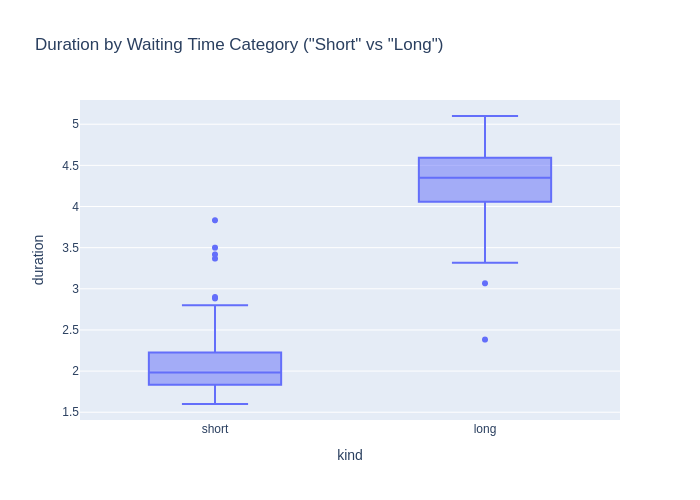

In [14]:
import statsmodels.formula.api as smf
from IPython.display import display
import plotly.express as px

# Create a "kind" column in the dataset
old_faithful['kind'] = ['long' if wait >= 68 else 'short' for wait in old_faithful['waiting']]

# Fit the model with an indicator variable for "kind" and display summary table
model = smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit()
display(model.summary().tables[1])

# Box plot to visually compare the distribution of duration for "short" and "long" groups
fig = px.box(old_faithful, x='kind', y='duration', 
             title='Duration by Waiting Time Category ("Short" vs "Long")',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer='png')


**Null Hypothesis:** There is no difference in the mean duration between short and long waiting time groups $(\beta_{\text{contrast}} = 0)$. This was evaluated by fitting a regression model with an indicator variable and examining the p-value for the $(k_i)$ variable.

**Evidence Against the Null Hypothesis:**

- **Intercept (Short Waits):** 2.0943, representing the estimated average eruption duration for short waiting times.
- **C(kind, Treatment(reference="short"))[T.long] (Difference Between Long and Short Waits):** 2.2036, the estimated average difference in eruption duration between long and short waiting times.  
    - With a p-value of 0, this provides strong evidence against the null hypothesis of "no difference."
- **Narrow Confidence Intervals:** Both coefficients have narrow 95% confidence intervals, indicating precision in the estimates.


**Chatgpt**: https://chatgpt.com/share/67296957-f288-8001-8c9a-a3ad8eabf3d5
Here’s a summary of the key points discussed in this chat:

1. **Null Hypothesis Overview**: The null hypothesis (H₀) proposed was that there is no linear association between waiting time and eruption duration in the Old Faithful dataset.

2. **Linear Continuous Model**:
   - A linear regression model was fitted using waiting time as a continuous predictor.
   - The slope coefficient of the model was analyzed to understand the relationship between waiting time and eruption duration.

3. **Categorical Model**:
   - A categorical model was created to analyze differences in eruption duration based on the 'kind' of eruption ('short' or 'long').
   - The model utilized treatment coding to set 'short' as the reference category.
   - The summary of the model provided coefficients that describe how average durations differ between categories.

4. **Comparison**:
   - The differences between the linear continuous model and the categorical model were outlined, focusing on the nature of the independent variable and the interpretation of coefficients.

5. **Bootstrap and Simulation**:
   - Code was created to bootstrap the distribution of fitted slope coefficients under the null hypothesis of no linear association.
   - Simulated samples were generated to visualize the distribution of slopes and compare them against the observed data.

6. **Evidence Against the Null Hypothesis**:
   - Code was provided to extract p-values from the categorical model to assess if there is significant evidence against the null hypothesis regarding differences in means between the categories.
   - Visualization through a box plot was used to illustrate differences in eruption durations for the 'kind' of eruption.

7. **Replicability**: The importance of using a random seed in the bootstrapping process was emphasized to ensure that results are replicable.

This summary encapsulates the main points and analyses performed in the conversation, along with the provided code examples for statistical modeling and visualization. If more details or specific aspects need to be highlighted, please let me know!